In [1]:
library(tidyverse)
library(tm)
library(SnowballC)
library(wordcloud)
library(RColorBrewer)
library(ggplot2)
library(lubridate)
library(scrubr)
library(gridExtra)

vgsale=read_csv('vgscore.csv')
vgsale$VGscore=NULL
vgsale$last_update=NULL
vgsale$url=NULL
names(vgsale)[names(vgsale) == 'pal_sale'] = 'eu_sale'
#修改格式
vgsale$release_Date=dmy(vgsale$release_Date)
vgsale$Year=year(vgsale$release_Date)
vgsale$tot_sale=parse_number(vgsale$tot_sale)
vgsale$user_Score=parse_number(vgsale$user_Score)
vgsale$tot_ship=parse_number(vgsale$tot_ship)
vgsale$na_sale=parse_number(vgsale$na_sale)
vgsale$eu_sale=parse_number(vgsale$eu_sale)
vgsale$jp_sale=parse_number(vgsale$jp_sale)
vgsale$other_sale=parse_number(vgsale$other_sale)

#由于游戏销售额并不是公开数据，数据来源的销售数据是估计值。会存在实际值与数据的估计值存在偏差的现象。
#有些游戏并没有销售额数据，仅有发售数量数据，由于我个人很难从发售数量估计销售额，所以忽略了这一小部分游戏。
#其中发售量很多的包括1985年发售的马里奥兄弟，06年发售的Wii Sports、17年PC平台的PUBG等。

Warning message:
"package 'tidyverse' was built under R version 3.6.1"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.2.0     √ purrr   0.3.2
√ tibble  2.1.3     √ dplyr   0.8.3
√ tidyr   0.8.3     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.1"Warning message:
"package 'tidyr' was built under R version 3.6.1"Warning message:
"package 'readr' was built under R version 3.6.1"Warning message:
"package 'purrr' was built under R version 3.6.1"Warning message:
"package 'dplyr' was built under R version 3.6.1"Warning message:
"package 'stringr' was built under R version 3.6.1"Warning message:
"package 'forcats' was built under R version 3.6.1"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'tm' was built under R version 3.6.1"Loading required 

In [395]:
vgsale %>% filter(vgsale$tot_ship>0)

title,user_Score,release_Date,console,publisher,developer,tot_ship,tot_sale,na_sale,eu_sale,jp_sale,other_sale,Year
Wii Sports,NA,2006-11-19,Wii,Nintendo,Nintendo EAD,82.87,NA,NA,NA,NA,NA,2006
Super Mario Bros.,8.2,1985-10-18,NES,Nintendo,Nintendo EAD,40.24,NA,NA,NA,NA,NA,1985
Mario Kart Wii,9.1,2008-04-27,Wii,Nintendo,Nintendo EAD,37.20,NA,NA,NA,NA,NA,2008
PlayerUnknown's Battlegrounds,NA,2017-12-21,PC,PUBG Corporation,PUBG Corporation,36.60,NA,NA,NA,NA,NA,2017
Wii Sports Resort,8.8,2009-07-26,Wii,Nintendo,Nintendo EAD,33.10,NA,NA,NA,NA,NA,2009
Pokémon Red / Green / Blue Version,NA,1998-09-30,GB,Nintendo,Game Freak,31.38,NA,NA,NA,NA,NA,1998
New Super Mario Bros.,8.1,2006-05-15,DS,Nintendo,Nintendo EAD,30.80,NA,NA,NA,NA,NA,2006
New Super Mario Bros. Wii,9.2,2009-11-15,Wii,Nintendo,Nintendo EAD,30.26,NA,NA,NA,NA,NA,2009
Tetris,NA,1989-06-01,GB,Nintendo,Bullet Proof Software,30.26,NA,NA,NA,NA,NA,1989
Minecraft,NA,2010-05-10,PC,Mojang,Mojang AB,30.01,NA,NA,NA,NA,NA,2010


In [337]:
#有些游戏是没有评估销量数据的，比如，黑暗剑（划掉）黑暗之魂3.所以没法出现在我们的数据中。遗憾。
vgsale%>%filter(title=='Dark Souls III')

title,user_Score,release_Date,console,publisher,developer,tot_ship,tot_sale,na_sale,eu_sale,jp_sale,other_sale,Year
Dark Souls III,NA,2016-04-11,PC,Namco Bandai Games,From Software,3.29,NA,NA,NA,NA,NA,2016
Dark Souls III,NA,2016-04-12,PS4,Namco Bandai Games,From Software,2.09,NA,NA,NA,NA,NA,2016
Dark Souls III,NA,2016-04-12,XOne,Namco Bandai Games,From Software,1.01,NA,NA,NA,NA,NA,2016


In [158]:
names(vgsale)

[1] "title"        "user_Score"   "release_Date" "console"      "publisher"   
 [6] "developer"    "tot_ship"     "tot_sale"     "na_sale"      "eu_sale"     
[11] "jp_sale"      "other_sale"

In [315]:
vgsale %>% arrange(desc(tot_sale)) 

title,user_Score,release_Date,console,publisher,developer,tot_ship,tot_sale,na_sale,eu_sale,jp_sale,other_sale,Year
Grand Theft Auto V,NA,2013-09-17,PS3,Rockstar Games,Rockstar North,NA,20.32,6.37,9.85,0.99,3.12,2013
Grand Theft Auto V,NA,2014-11-18,PS4,Rockstar Games,Rockstar North,NA,19.39,6.06,9.71,0.60,3.02,2014
Grand Theft Auto: Vice City,NA,2002-10-28,PS2,Rockstar Games,Rockstar North,NA,16.15,8.41,5.49,0.47,1.78,2002
Grand Theft Auto V,NA,2013-09-17,X360,Rockstar Games,Rockstar North,NA,15.86,9.06,5.33,0.06,1.42,2013
Call of Duty: Black Ops 3,NA,2015-11-06,PS4,Activision,Treyarch,NA,15.09,6.18,6.05,0.41,2.44,2015
Call of Duty: Modern Warfare 3,NA,2011-11-08,X360,Activision,Infinity Ward,NA,14.82,9.07,4.29,0.13,1.33,2011
Call of Duty: Black Ops,NA,2010-11-09,X360,Activision,Treyarch,NA,14.74,9.76,3.73,0.11,1.14,2010
Red Dead Redemption 2,NA,2018-10-26,PS4,Rockstar Games,Rockstar Games,NA,13.94,5.26,6.21,0.21,2.26,2018
Call of Duty: Black Ops II,NA,2012-11-13,X360,Activision,Treyarch,NA,13.86,8.27,4.32,0.07,1.20,2012
Call of Duty: Black Ops II,NA,2012-11-13,PS3,Activision,Treyarch,NA,13.80,4.99,5.88,0.65,2.28,2012


In [2]:
names=vgsale$title
uniname=unique(names)

corpus = Corpus(VectorSource(uniname))

corpus = tm_map(corpus, tolower) 
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords("english")) 
corpus = tm_map(corpus, stripWhitespace)
corpus = tm_map(corpus, stemDocument) 

tdm = TermDocumentMatrix(corpus)
tdm=removeSparseTerms(tdm, 0.999)

Warning message in tm_map.SimpleCorpus(corpus, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, stemDocument):
"transformation drops documents"

In [3]:
freq = colSums(as.matrix(tdm))   
length(freq)   

[1] 37157

In [192]:
length(uniname)

[1] 37157

In [193]:
nrow(vgsale)

[1] 55864

In [189]:
min(vgsale$Year,na.rm=T)

[1] 1970

In [4]:
m = as.matrix(tdm)
v = sort(rowSums(m),decreasing=TRUE)
worddf = data.frame(word = names(v),freq=v)


In [5]:
worddf1= worddf %>% top_n(15)
worddf1

Selecting by freq


word,freq
game,771
world,701
war,652
super,604
edit,507
adventur,504
seri,504
battl,483
star,470
vol,404


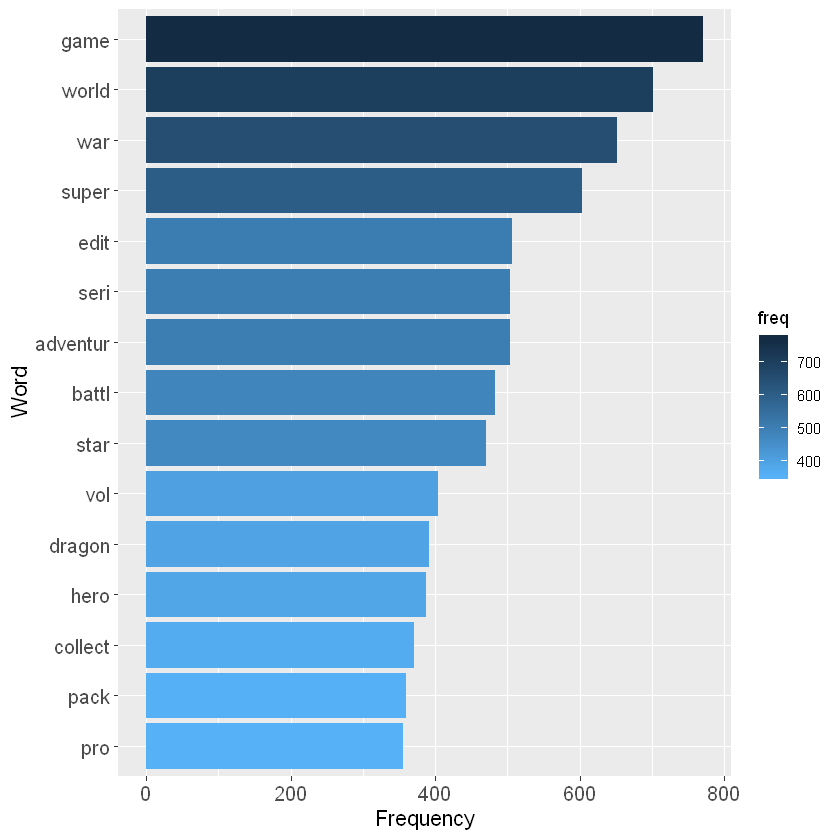

In [6]:
plot1 = ggplot(worddf1,aes(x = reorder(word,freq), y = freq,fill=freq))+
geom_bar(stat = "identity")+
scale_fill_gradient(high = "#132B43", low = "#56B1F7")+
ylab('Frequency')+
xlab('Word')+
theme(axis.text.y=element_text(size=12))+
theme(axis.text.x=element_text(size=12))+
theme(axis.title.x=element_text(size=13))+
theme(axis.title.y=element_text(size=13))+
theme(plot.title = element_text(hjust=0.5))+
coord_flip()

plot1

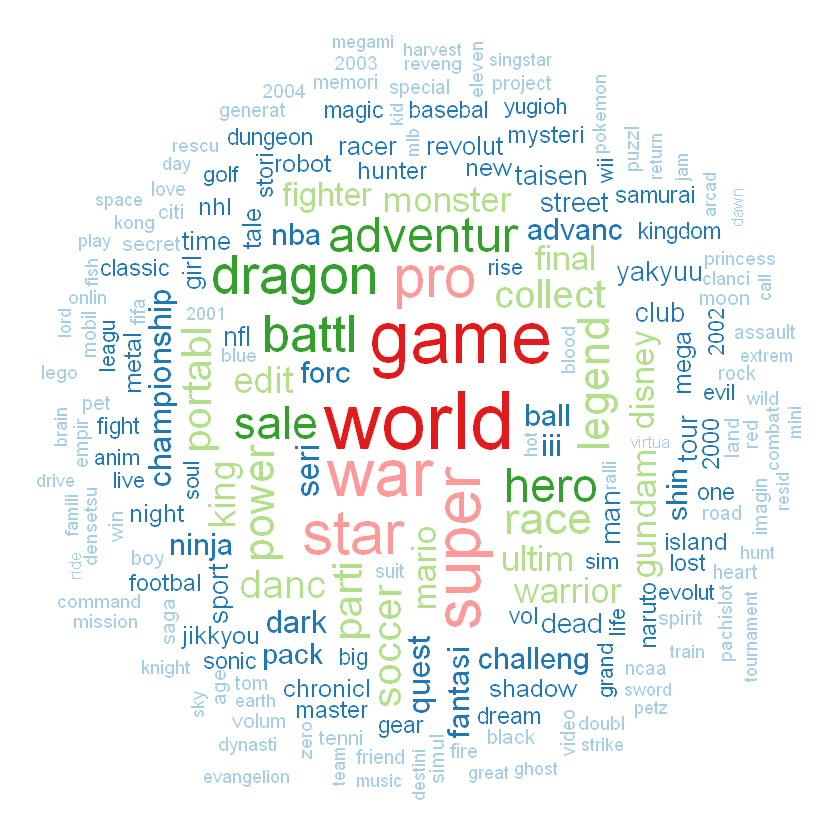

In [215]:
#要用非重复的才行哦，因为有重复出版的
wordcloud(words = worddf1$word, freq = worddf1$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(6,'Paired'))

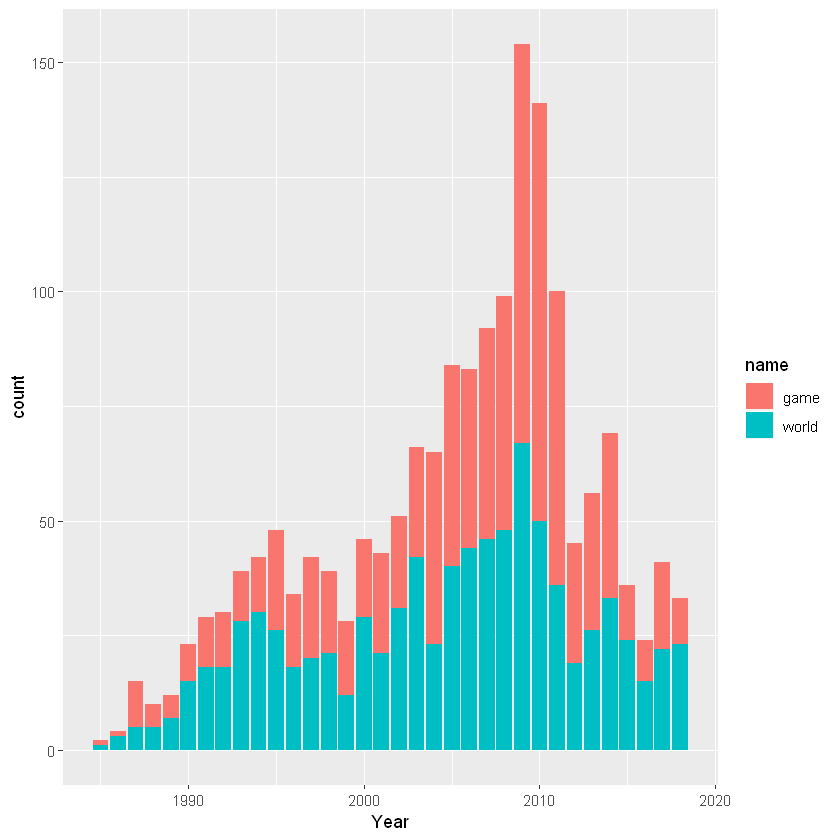

In [36]:
#新做2个列判断名字里有world\World game/Game
vgsale$world=grepl('world',tolower(vgsale$title))
vgsale$game=grepl('game',tolower(vgsale$title))
NameYear=vgsale %>% select(title,Year,world,game) %>% arrange(Year) %>% filter(world=='TRUE'|game=='TRUE')
NameYear=distinct(NameYear)
NameYear$dup=duplicated(NameYear$title)
NameYear$dup=NULL
NameYear=NameYear %>% filter(Year<=2018&Year>=1985)
NameYear$name=ifelse(NameYear$world=='TRUE','world','game')
ggplot(NameYear,aes(x=Year,fill=name))+
geom_bar(stat='count')

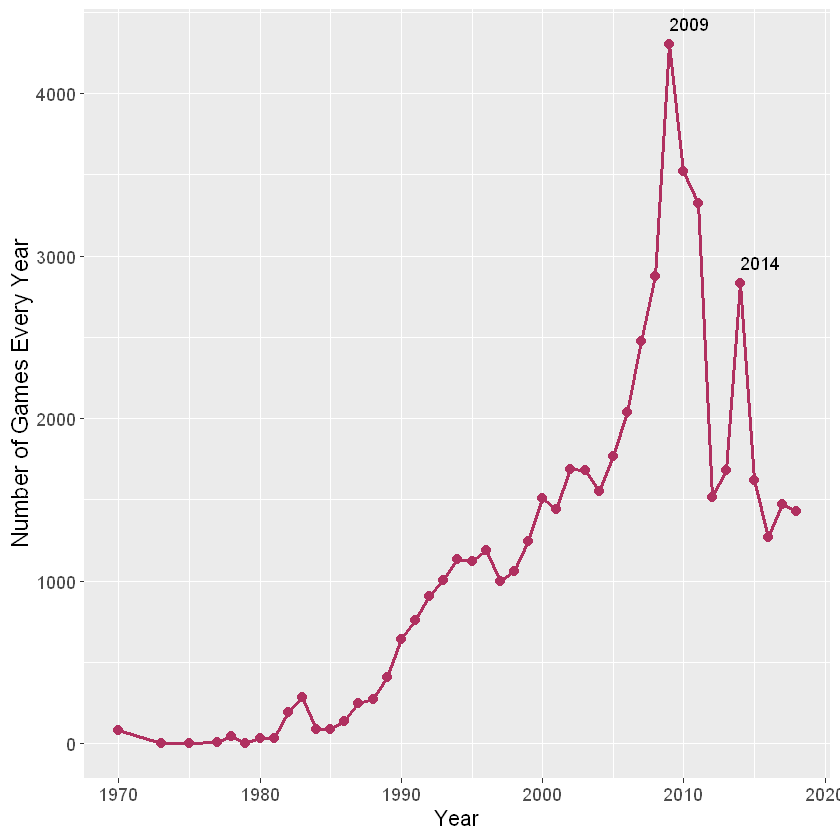

In [255]:
NumPerYear= vgsale %>% filter(Year<=2018) %>% group_by(Year) %>% count(Year) 

ggplot(NumPerYear, aes(Year,n))+
geom_point(size=2.5,color='maroon')+
geom_text(aes(label=ifelse(Year==2009 | Year == 2014,as.character(Year),'')),hjust=0,vjust=-1)+
geom_line(size=1,color='maroon')+
theme(axis.text.y=element_text(size=11))+
theme(axis.text.x=element_text(size=11))+
ylab('Number of Games Every Year')+
theme(axis.title.x=element_text(size=13))+
theme(axis.title.y=element_text(size=14))

#发售数量与年份的关系

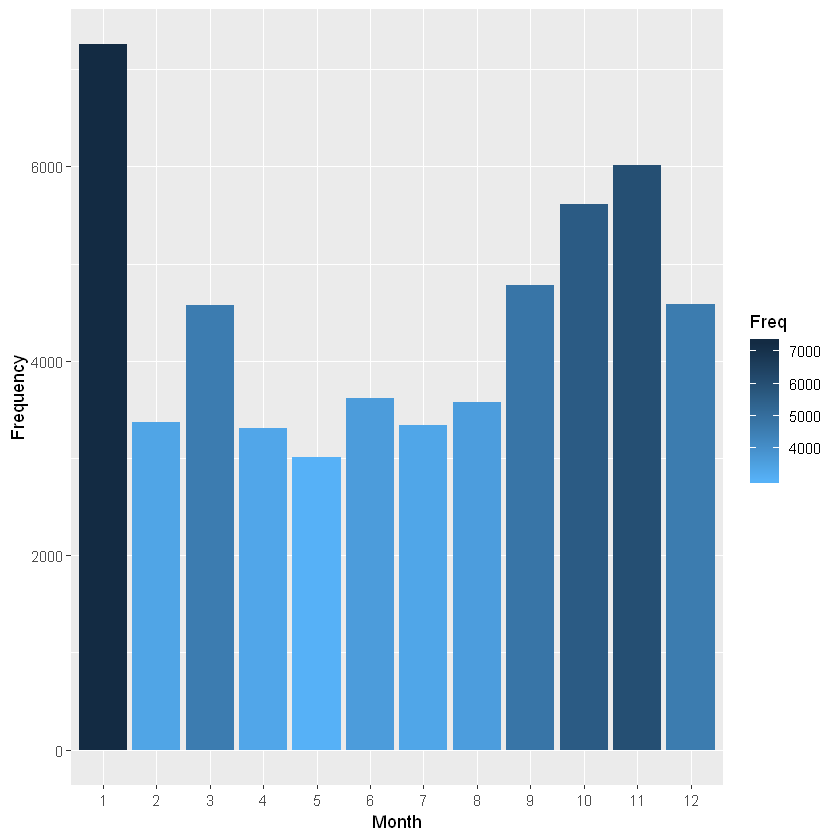

In [188]:
#分析一下一年十二个月哪个月发游戏数量最多

monthNum=data.frame(table(month(vgsale$release_Date)))
ggplot(monthNum,aes(x = Var1, y = Freq,fill=Freq))+
geom_bar(stat = "identity")+
scale_fill_gradient(high = "#132B43", low = "#56B1F7")+
xlab('Month')+
ylab('Frequency')

Selecting by money
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


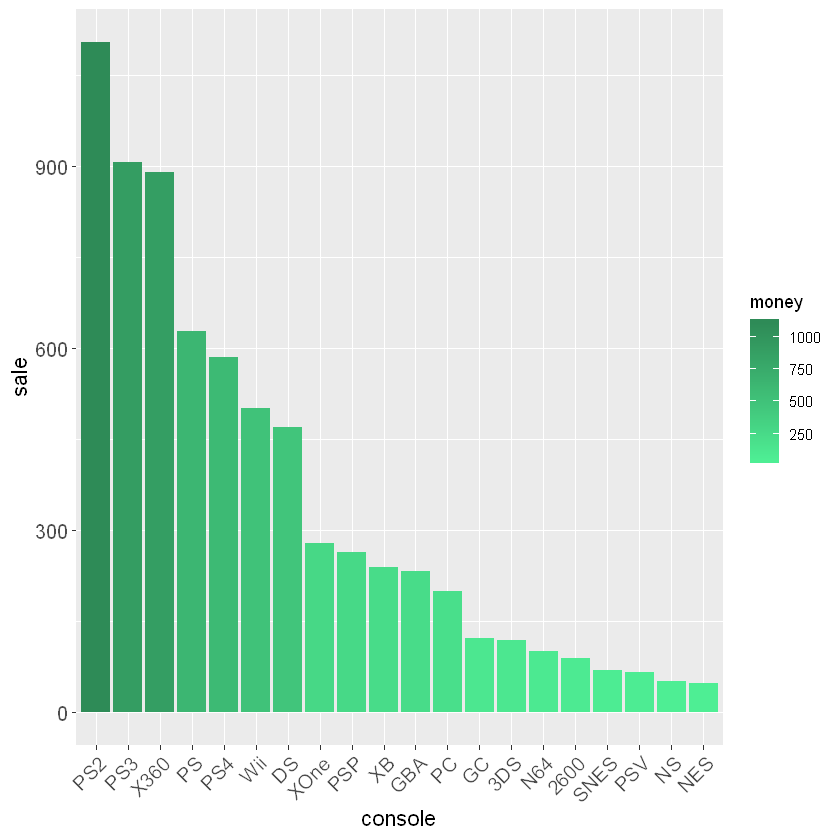

In [15]:
PfSales=vgsale%>% select(console,tot_sale)%>% group_by(console) %>% summarize(money=sum(tot_sale, na.rm=T)) %>% arrange(desc(money)) %>% filter(money>0) %>% top_n(20)
ggplot(PfSales,aes(x = reorder(console,-money),y=money,fill=money))+
geom_bar(stat = "identity")+
scale_fill_gradient()+
theme(axis.text.y=element_text(size=12))+
theme(axis.text.x=element_text(size=12))+
theme(axis.title.x=element_text(size=13))+
theme(axis.title.y=element_text(size=13))+
theme(plot.title = element_text(hjust=0.5))+
theme(axis.text.x = element_text(angle=45, hjust=1))+
ylab('sale')+
xlab('console')+
scale_fill_gradient(high = "seagreen4", low = "seagreen2")

#增大空隙哦
#颜色换一下、lab改一下，横过来也可以

In [197]:
a123=vgsale %>% filter(Year=='2009') %>% arrange(console)
table(a123$console)


  And   BRW    DC    DS   DSi  DSiW Linux   Mob   OSX    PC    PS   PS2   PS3 
    1     1     3   686     1   188     6     2    15   563     1   178   174 
  PSN   PSP   PSV  S32X    VC   Wii  WiiU  WinP    WW  X360   XBL 
  500   254     3     1   154   393     1     1   139   190   848 

In [278]:
sum(vgsale$tot_sale,na.rm=T)

[1] 7096.1

In [289]:
PfSales=vgsale%>% select(console,tot_sale)%>% group_by(console) %>% summarize(money=sum(tot_sale, na.rm=T)) %>% arrange(desc(money)) %>% filter(money>0) %>% top_n(20)
PfSales

Selecting by money


console,money
PS2,1103.62
PS3,905.72
X360,889.49
PS,627.01
PS4,585.09
Wii,500.39
DS,469.65
XOne,278.56
PSP,263.71
XB,237.72


Selecting by money
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


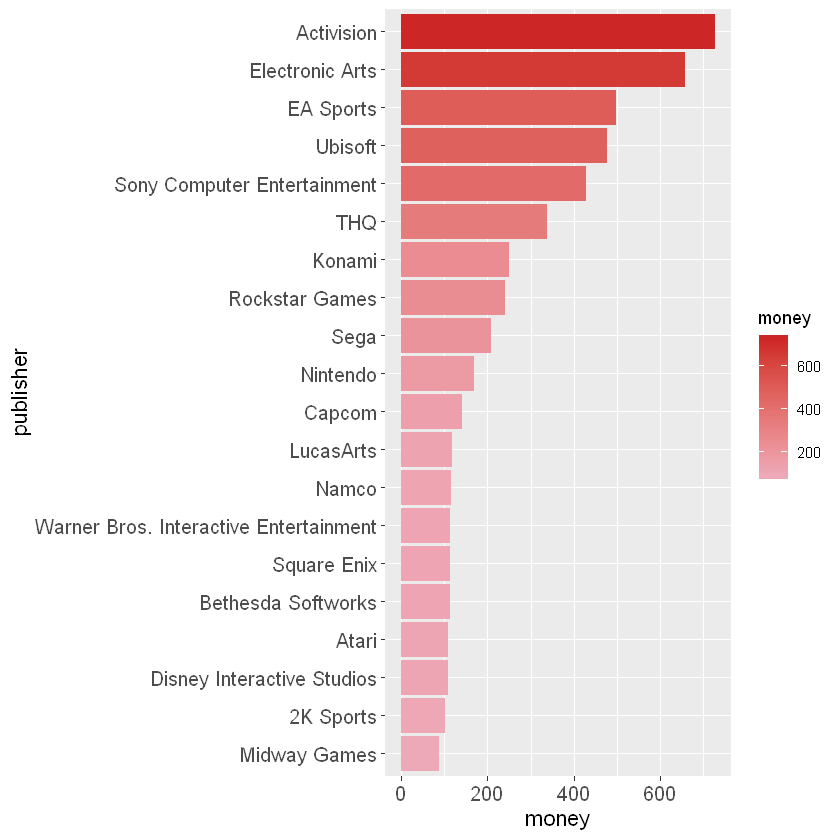

In [69]:
PubSales=vgsale%>% select(publisher,tot_sale)%>% group_by(publisher) %>% summarize(money=sum(tot_sale, na.rm=T)) %>% arrange(desc(money)) %>% filter(money>0) %>% top_n(20)

ggplot(PubSales,aes(x = reorder(publisher,money),y=money,fill=money))+
geom_bar(stat = "identity")+
scale_fill_gradient()+
theme(axis.text.y=element_text(size=12))+
theme(axis.text.x=element_text(size=12))+
theme(axis.title.x=element_text(size=13))+
theme(axis.title.y=element_text(size=13))+
theme(plot.title = element_text(hjust=0.5))+
scale_fill_gradient(high = "firebrick3", low = "pink2")+
xlab('publisher')+
coord_flip()
#字太多了！还是横过来吧


Warning message:
"Removed 16 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

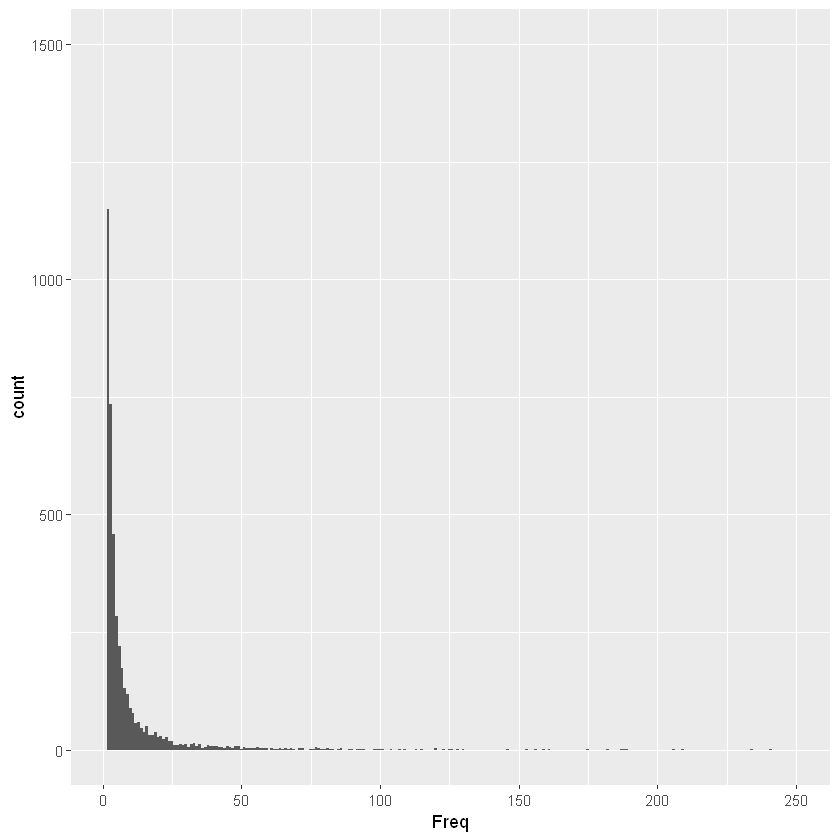

In [34]:
#发行商的分析
dedf=data.frame(table(vgsale$developer))
ggplot(dedf,aes(Freq))+
geom_histogram(binwidth=1)+
xlim(1,250)+
ylim(0,1500)

#中位数是2，出版数前几位占据了绝大多数的出版。还有非常多我们不知道的小出版商在默默出版游戏。出版了1个游戏的公司最多。很多公司都不再尝试了。


In [35]:
dedf=data.frame(table(vgsale$developer))
summary(dedf$Freq)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    1.000    2.000    6.882    4.000 4621.000 

In [13]:
1171+459+351+178+140

[1] 2299

In [43]:
#year & publisher
yearpub1=vgsale %>% select(publisher) %>% group_by(publisher) %>% count() %>% arrange(desc(n)) %>% filter(publisher !='Unknown')
yearpub1

publisher,n
Sega,2084
Ubisoft,1519
Activision,1518
Electronic Arts,1501
Konami,1499
Sony Computer Entertainment,1353
Nintendo,1351
Microsoft,1268
THQ,1065
Capcom,966


In [37]:
YearPubDf %>% arrange(desc(Freq))

ERROR: Error in eval(lhs, parent, parent): 找不到对象'YearPubDf'


In [40]:
1171+459+351+178+140
2299/3146

[1] 2299

[1] 0.7307692

In [28]:
PubTitle= vgsale %>% select(publisher,title) %>% filter(publisher != 'Unknown') 
PubTitleDist=distinct(PubTitle)


Selecting by Freq


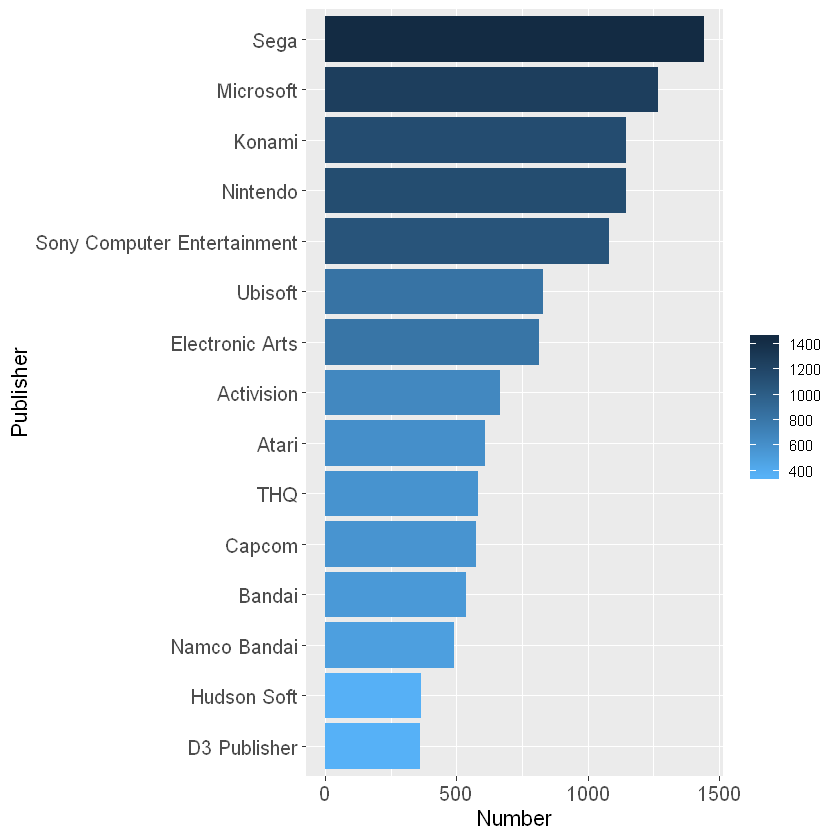

In [44]:
#目的：昙花一现的出版商有多少个
#先筛选一下，因为太多了。看一下每个出版商出版个数。
#select year,publisher, 对每个出版商计数，然后再计数计数的频率。table第二列。

#要去掉unknown啊。
#要变成unique title才行呀

PubTitle= vgsale %>% select(publisher,title) %>% filter(publisher != 'Unknown') 
PubTitleDist=distinct(PubTitle)

PubDf=data.frame(table(PubTitleDist$publisher))
PubDfcount=data.frame(table(yearpub1)) %>% arrange(desc(Freq))


#除去没有记录发行商的游戏，在3146个发行商里，有1171个发行商只发行过1个游戏，发行过5个游戏以下的发行商有2299个，占了73%。

#发行数前15名的bar图：(多平台发行的都算同一个)
PubDf %>% arrange(desc(Freq)) %>% top_n(15) %>%
ggplot(aes(x = reorder(Var1,Freq), y = Freq,fill=Freq))+
geom_bar(stat = "identity")+
scale_fill_gradient(high = "#132B43", low = "#56B1F7",name='')+
xlab('Publisher')+
ylab('Number')+
theme(axis.text.y=element_text(size=12))+
theme(axis.text.x=element_text(size=12))+
theme(axis.title.x=element_text(size=13))+
theme(axis.title.y=element_text(size=13))+
theme(plot.title = element_text(hjust=0.5))+
coord_flip()

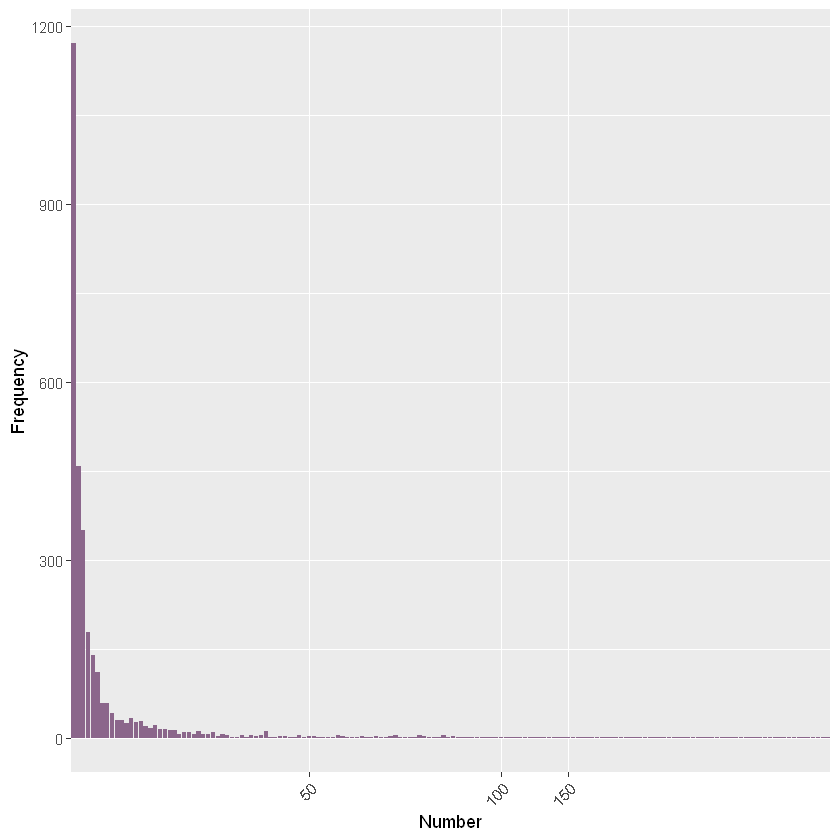

In [70]:
#发行数量分布
data.frame(table(yearpub1$n))%>% 
ggplot(aes(Var1,Freq))+
geom_bar(stat="identity",fill='plum4')+
scale_x_discrete(breaks = seq(0,1000, by = 50)) +
theme(axis.text.x = element_text(angle=45, hjust=1))+
xlab('Number')+
ylab('Frequency')#超过150已经凤毛麟角了

In [199]:
length(unique(vgsale$publisher))

[1] 3147

In [74]:
#获得多平台发布的游戏
#创建一个titledup列 OK

#得到所有名字重复的列 OK 

vgsale$titledup=duplicated(vgsale$title) | duplicated(vgsale$title, fromLast=TRUE)
vgsale$user_Score=NULL
vgsale$tot_ship=NULL

In [75]:
vgTitleDup=vgsale %>% filter(titledup=='TRUE') %>% filter(tot_sale>0)
vgTitleDup$titledup2 = duplicated(vgTitleDup$title) | duplicated(vgTitleDup$title, fromLast=TRUE)
vgTitleDup2=vgTitleDup %>% filter(titledup2=='TRUE')

#把NA都变成0
vgTitleDup2$jp_sale=ifelse(is.na(vgTitleDup2$jp_sale),0,vgTitleDup2$jp_sale)
vgTitleDup2$na_sale=ifelse(is.na(vgTitleDup2$na_sale),0,vgTitleDup2$na_sale)
vgTitleDup2$eu_sale=ifelse(is.na(vgTitleDup2$eu_sale),0,vgTitleDup2$eu_sale)
vgTitleDup2$tot_sale=ifelse(is.na(vgTitleDup2$tot_sale),0,vgTitleDup2$tot_sale)
vgTitleDup2$other_sale=ifelse(is.na(vgTitleDup2$other_sale),0,vgTitleDup2$other_sale)



vgTitleDup2$naratio=vgTitleDup2$na_sale/max(vgTitleDup2$na_sale,na.rm=T)
vgTitleDup2$euratio=vgTitleDup2$eu_sale/max(vgTitleDup2$eu_sale,na.rm=T)
vgTitleDup2$jpratio=vgTitleDup2$jp_sale/max(vgTitleDup2$jp_sale,na.rm=T)
vgTitleDup2$otherratio=vgTitleDup2$other_sale/max(vgTitleDup2$other_sale,na.rm=T)



In [76]:
vgTitleDup2$titledup2=NULL
vgTitleDup2$console=NULL

a=vgTitleDup2 %>% group_by(title) %>% summarise(sum(tot_sale)) 
b=vgTitleDup2 %>% group_by(title) %>% summarise(sum(na_sale)) 
c=vgTitleDup2 %>% group_by(title) %>% summarise(sum(eu_sale)) 
d=vgTitleDup2 %>% group_by(title) %>% summarise(sum(jp_sale)) 
e=vgTitleDup2 %>% group_by(title) %>% summarise(sum(other_sale)) 
TSsum=cbind(a,list(b[2],c[2],d[2],e[2]))
names(TSsum)=c('title','tot_sale','na_sale','eu_sale','jp_sale','other_sale')

In [77]:
vgTitleDup=vgsale %>% filter(titledup=='TRUE') %>% filter(tot_sale>0)
vgTitleDup$titledup2 = duplicated(vgTitleDup$title) | duplicated(vgTitleDup$title, fromLast=TRUE)
vgTitleDup2=vgTitleDup %>% filter(titledup2=='TRUE')

#把NA都变成0
vgTitleDup2$jp_sale=ifelse(is.na(vgTitleDup2$jp_sale),0,vgTitleDup2$jp_sale)
vgTitleDup2$na_sale=ifelse(is.na(vgTitleDup2$na_sale),0,vgTitleDup2$na_sale)
vgTitleDup2$eu_sale=ifelse(is.na(vgTitleDup2$eu_sale),0,vgTitleDup2$eu_sale)
vgTitleDup2$tot_sale=ifelse(is.na(vgTitleDup2$tot_sale),0,vgTitleDup2$tot_sale)
vgTitleDup2$other_sale=ifelse(is.na(vgTitleDup2$other_sale),0,vgTitleDup2$other_sale)

#按title，sum所有的钱数。


In [78]:
vgTitleDup2 %>% top_n(10)

Selecting by titledup2


title,release_Date,console,publisher,developer,tot_sale,na_sale,eu_sale,jp_sale,other_sale,Year,world,game,titledup,titledup2
Grand Theft Auto V,2013-09-17,PS3,Rockstar Games,Rockstar North,20.32,6.37,9.85,0.99,3.12,2013,FALSE,FALSE,TRUE,TRUE
Grand Theft Auto V,2014-11-18,PS4,Rockstar Games,Rockstar North,19.39,6.06,9.71,0.60,3.02,2014,FALSE,FALSE,TRUE,TRUE
Grand Theft Auto: Vice City,2002-10-28,PS2,Rockstar Games,Rockstar North,16.15,8.41,5.49,0.47,1.78,2002,FALSE,FALSE,TRUE,TRUE
Grand Theft Auto V,2013-09-17,X360,Rockstar Games,Rockstar North,15.86,9.06,5.33,0.06,1.42,2013,FALSE,FALSE,TRUE,TRUE
Call of Duty: Black Ops 3,2015-11-06,PS4,Activision,Treyarch,15.09,6.18,6.05,0.41,2.44,2015,FALSE,FALSE,TRUE,TRUE
Call of Duty: Modern Warfare 3,2011-11-08,X360,Activision,Infinity Ward,14.82,9.07,4.29,0.13,1.33,2011,FALSE,FALSE,TRUE,TRUE
Call of Duty: Black Ops,2010-11-09,X360,Activision,Treyarch,14.74,9.76,3.73,0.11,1.14,2010,FALSE,FALSE,TRUE,TRUE
Red Dead Redemption 2,2018-10-26,PS4,Rockstar Games,Rockstar Games,13.94,5.26,6.21,0.21,2.26,2018,FALSE,FALSE,TRUE,TRUE
Call of Duty: Black Ops II,2012-11-13,X360,Activision,Treyarch,13.86,8.27,4.32,0.07,1.20,2012,FALSE,FALSE,TRUE,TRUE
Call of Duty: Black Ops II,2012-11-13,PS3,Activision,Treyarch,13.80,4.99,5.88,0.65,2.28,2012,FALSE,FALSE,TRUE,TRUE


In [79]:
#要有totsale才能分析啊，tot_sale如果是NA，猜测原因是没有卖。那么把tot_sale是NA的行都去掉，那么有可能只剩一行了，这个时候再把这一行除掉。
length(unique(vgTitleDup2$title))
#有3356个有总销售额数据的游戏多平台发售
#然后分析什么呢？


[1] 3173

In [80]:
vgTitleDup=vgsale %>% filter(titledup=='TRUE') %>% filter(tot_sale>0)
vgTitleDup$titledup2 = duplicated(vgTitleDup$title) | duplicated(vgTitleDup$title, fromLast=TRUE)
vgTitleDup2=vgTitleDup %>% filter(titledup2=='TRUE')

#把NA都变成0
vgTitleDup2$jp_sale=ifelse(is.na(vgTitleDup2$jp_sale),0,vgTitleDup2$jp_sale)
vgTitleDup2$na_sale=ifelse(is.na(vgTitleDup2$na_sale),0,vgTitleDup2$na_sale)
vgTitleDup2$eu_sale=ifelse(is.na(vgTitleDup2$eu_sale),0,vgTitleDup2$eu_sale)
vgTitleDup2$tot_sale=ifelse(is.na(vgTitleDup2$tot_sale),0,vgTitleDup2$tot_sale)
vgTitleDup2$other_sale=ifelse(is.na(vgTitleDup2$other_sale),0,vgTitleDup2$other_sale)
#跑题了嗷,,,我要把这些行与单一平台发售的放在一起，这样就好啦嘿嘿

In [81]:
#所有游戏的全平台的销量
vgNoConsol = vgsale
vgNoConsol$duptitle=duplicated(vgNoConsol$title) | duplicated(vgNoConsol$title, fromLast=TRUE)
vgNoConsol=vgNoConsol %>% filter(duptitle=='FALSE')
vgNoConsol=vgNoConsol %>% select(title,tot_sale,na_sale,eu_sale,jp_sale,other_sale)
vgNoConsol=rbind(vgNoConsol,TSsum)

#把tot_sale是NA的都剔除
vgNoConsol=vgNoConsol %>% filter(tot_sale>0)

#做比例col
vgNoConsol$NaRatio=vgNoConsol$na_sale/quantile(vgNoConsol$na_sale,0.95,na.rm=T)
vgNoConsol$EuRatio=vgNoConsol$eu_sale/quantile(vgNoConsol$eu_sale,0.95,na.rm=T)
vgNoConsol$JpRatio=vgNoConsol$jp_sale/quantile(vgNoConsol$jp_sale,0.95,na.rm=T)
vgNoConsol$OtherRatio=vgNoConsol$other_sale/quantile(vgNoConsol$other_sale,0.95,na.rm=T)


vgNoConsol %>% arrange(desc(tot_sale)) %>% top_n(10,tot_sale)



title,tot_sale,na_sale,eu_sale,jp_sale,other_sale,NaRatio,EuRatio,JpRatio,OtherRatio
Grand Theft Auto V,64.29,26.19,28.14,1.66,8.32,14.229829,24.030743,4.150,22.486486
Call of Duty: Black Ops,30.99,17.65,9.45,0.59,3.31,9.589785,8.070026,1.475,8.945946
Call of Duty: Modern Warfare 3,30.71,15.57,11.26,0.62,3.26,8.459658,9.615713,1.550,8.810811
Call of Duty: Black Ops II,29.59,14.12,11.08,0.72,3.67,7.671828,9.461998,1.800,9.918919
Call of Duty: Ghosts,28.80,15.06,9.60,0.49,3.65,8.182559,8.198121,1.225,9.864865
Call of Duty: Black Ops 3,26.72,12.82,9.76,0.50,3.63,6.965499,8.334757,1.250,9.810811
Call of Duty: Modern Warfare 2,25.02,13.54,8.08,0.46,2.95,7.356697,6.900085,1.150,7.972973
Minecraft,24.01,9.07,9.48,2.50,2.96,4.928009,8.095645,6.250,8.000000
Grand Theft Auto IV,22.53,11.60,7.64,0.58,2.72,6.302635,6.524338,1.450,7.351351
Call of Duty: Advanced Warfare,21.78,10.66,7.99,0.35,2.81,5.791904,6.823228,0.875,7.594595


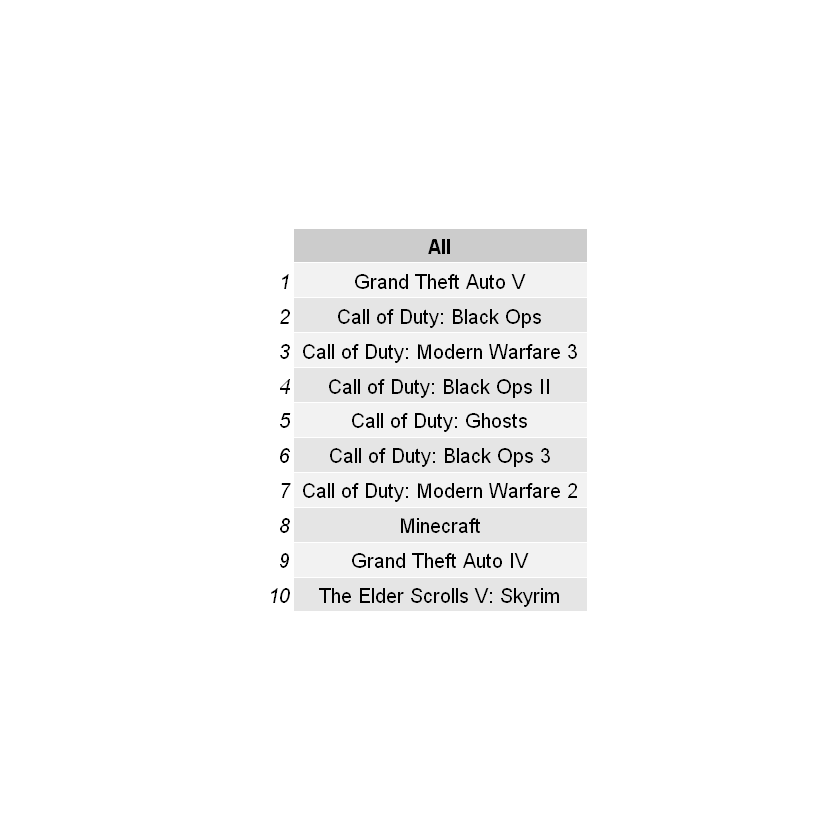

In [84]:
#全地区卖得好的
goodsaleall= vgNoConsol %>% filter(NaRatio>1 & EuRatio>1 & JpRatio>1 &OtherRatio>1) %>% arrange(desc(tot_sale)) %>% top_n(10,tot_sale) %>% 
select(title)
names(goodsaleall)='All'


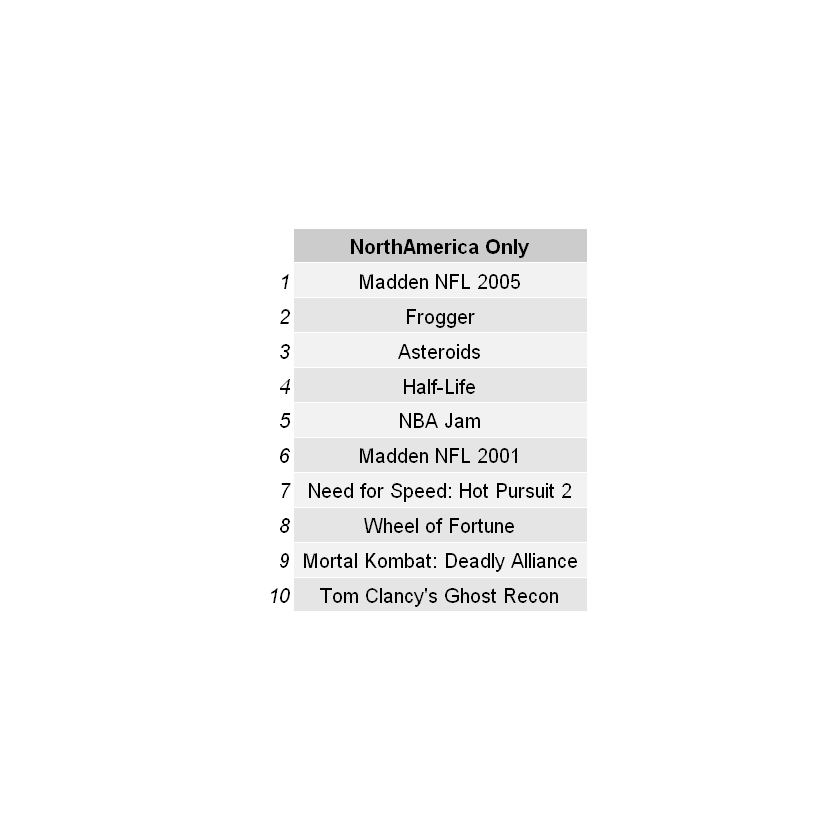

In [85]:
#只在NA卖得好
goodsaleNa=vgNoConsol %>% filter(NaRatio>1 & EuRatio<0.8 & JpRatio<0.8 &OtherRatio<0.8) %>% arrange(desc(na_sale)) %>% top_n(10,NaRatio) %>% 
select(title)
names(goodsaleNa)='NorthAmerica Only'



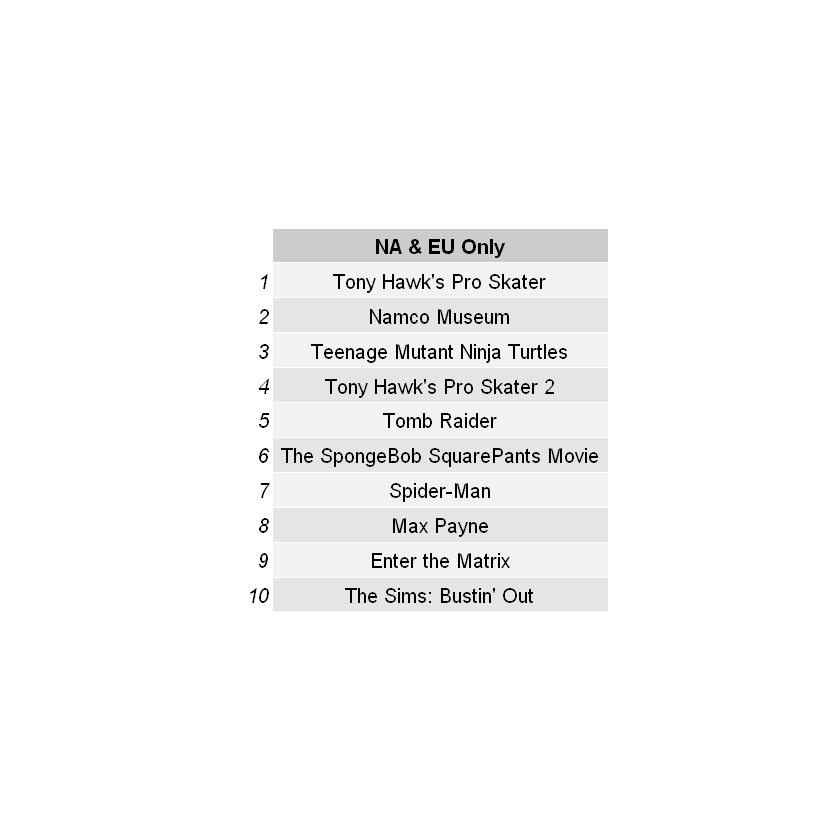

In [86]:
#只在欧美卖得好的
goodsaleNE=vgNoConsol %>% filter(NaRatio>1 & EuRatio>1 & JpRatio<0.8 &OtherRatio<0.8) %>% arrange(desc(na_sale)) %>% top_n(10,NaRatio) %>% 
select(title)
names(goodsaleNE)='NA & EU Only'


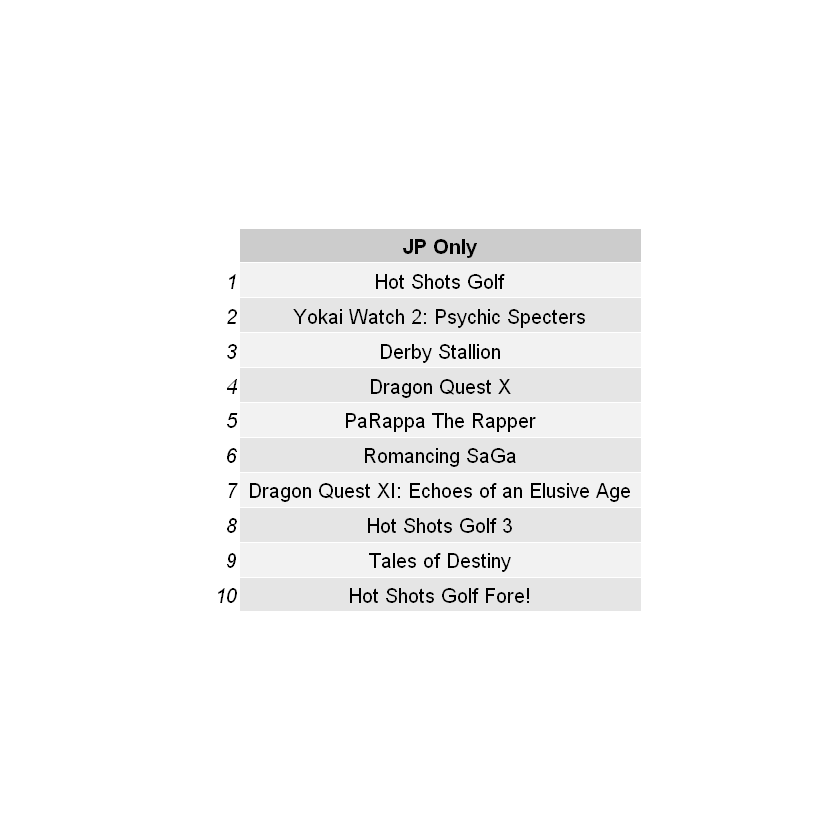

In [87]:
#只在日本卖得好的
goodsaleJP=vgNoConsol %>% filter(NaRatio<0.8 & EuRatio<0.8 & JpRatio>1 &OtherRatio<0.8) %>% arrange(desc(jp_sale)) %>% top_n(10,jp_sale)%>% 
select(title)
names(goodsaleJP)=c('JP Only')



Warning message in brewer.pal(2, "Purples"):
"minimal value for n is 3, returning requested palette with 3 different levels
"Warning message in brewer.pal(2, "PuBu"):
"minimal value for n is 3, returning requested palette with 3 different levels
"Warning message in brewer.pal(2, "YlGn"):
"minimal value for n is 3, returning requested palette with 3 different levels
"Warning message in brewer.pal(2, "RdPu"):
"minimal value for n is 3, returning requested palette with 3 different levels
"

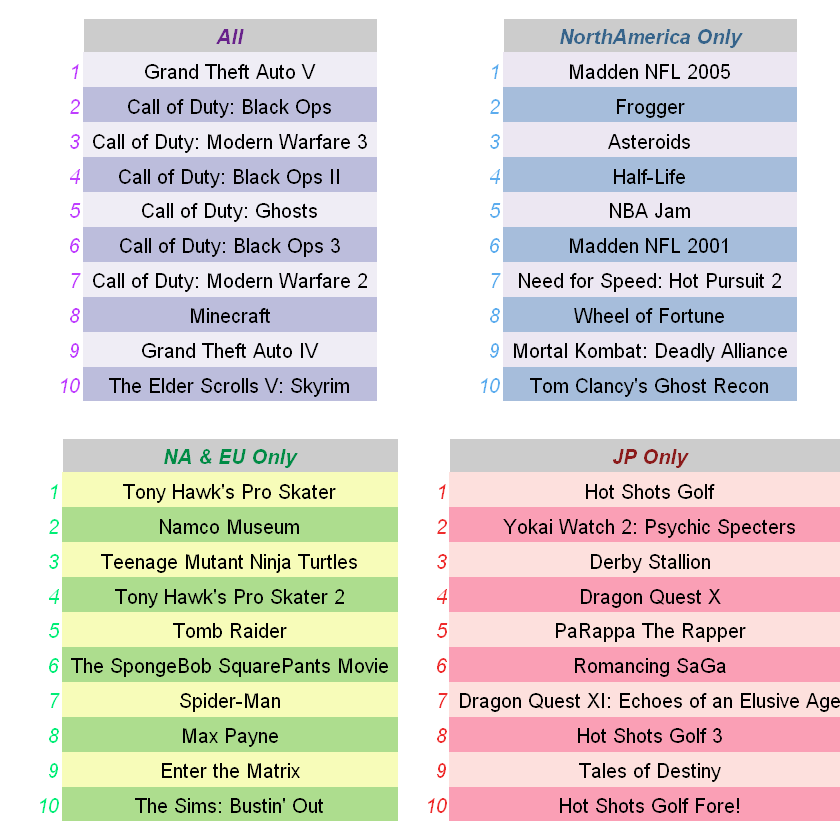

In [138]:
tt1=ttheme_default(
  core=list(bg_params = list(fill = brewer.pal(2,'Purples')[1:2], col=NA),
            fg_params=list(fontface=1)),
  colhead=list(fg_params=list(col="darkorchid4", fontface=4L)),
  rowhead=list(fg_params=list(col="darkorchid1", fontface=3L)))
tt2=ttheme_default(
  core=list(bg_params = list(fill = brewer.pal(2,'PuBu')[1:2], col=NA),
            fg_params=list(fontface=1)),
  colhead=list(fg_params=list(col="steelblue4", fontface=4L)),
  rowhead=list(fg_params=list(col="steelblue2", fontface=3L)))
tt3=ttheme_default(
  core=list(bg_params = list(fill = brewer.pal(2,'YlGn')[1:2], col=NA),
            fg_params=list(fontface=1)),
  colhead=list(fg_params=list(col="springgreen4", fontface=4L)),
  rowhead=list(fg_params=list(col="springgreen2", fontface=3L)))
tt4=ttheme_default(
  core=list(bg_params = list(fill = brewer.pal(2,'RdPu')[1:2], col=NA),
            fg_params=list(fontface=1)),
  colhead=list(fg_params=list(col="firebrick4", fontface=4L)),
  rowhead=list(fg_params=list(col="firebrick2", fontface=3L)))


grid.arrange(
  tableGrob(goodsaleall, theme=tt1),
    tableGrob(goodsaleNa, theme=tt2),
    tableGrob(goodsaleNE, theme=tt3),
    tableGrob(goodsaleJP, theme=tt4),
  nrow=2)


In [357]:
max(vgsale$tot_sale,na.rm=T)

[1] 20.32

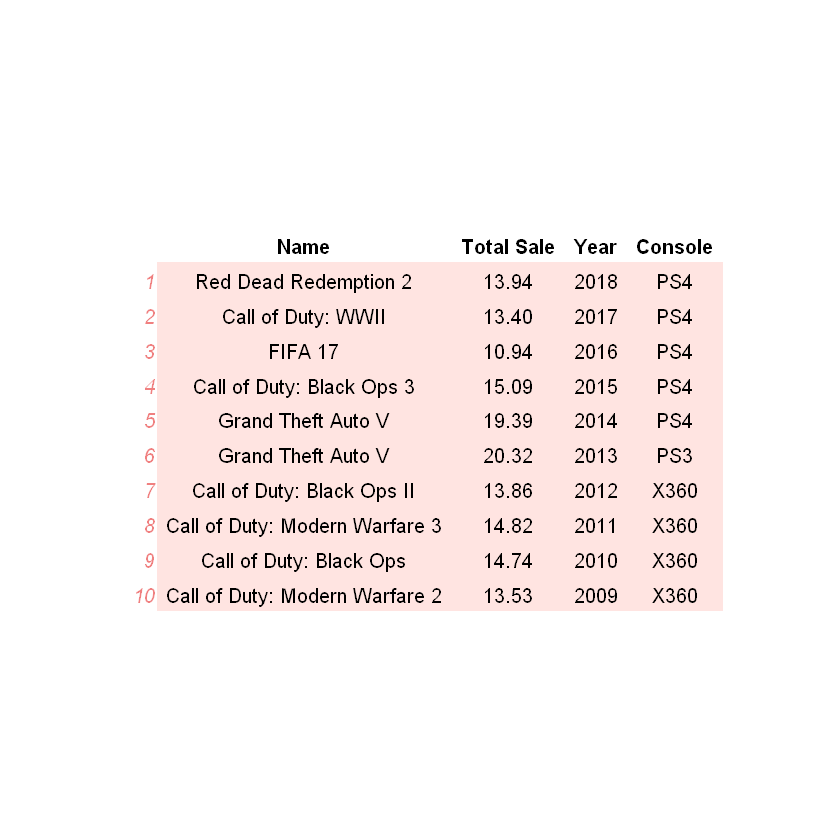

In [200]:
#每一年发售最高的游戏8,分平台哦

saleYearCon=vgsale %>% select(title,tot_sale,Year,console) %>% filter(tot_sale>0)%>% filter(Year<=2018 & Year >=2009) %>% arrange(desc(Year)) %>% group_by(Year) %>% filter(tot_sale == max(tot_sale))
names(saleYearCon)=c('Name','Total Sale','Year','Console')
tt5=ttheme_minimal(
  core=list(bg_params = list(fill = 'mistyrose', col=NA),
            fg_params=list(fontface=1)),
  colhead=list(fg_params=list(col="lightcoral", fontface=1)),
  rowhead=list(fg_params=list(col="lightcoral", fontface=3L)))


grid.arrange(
  tableGrob(saleYearCon, theme=tt5),

  nrow=1)

In [393]:
withMonthvgsale=vgsale
withMonthvgsale$Month=month(withMonthvgsale$release_Date)
head(withMonthvgsale)

title,user_Score,release_Date,console,publisher,developer,tot_ship,tot_sale,na_sale,eu_sale,jp_sale,other_sale,Year,Month
Wii Sports,NA,2006-11-19,Wii,Nintendo,Nintendo EAD,82.87,NA,NA,NA,NA,NA,2006,11
Super Mario Bros.,8.2,1985-10-18,NES,Nintendo,Nintendo EAD,40.24,NA,NA,NA,NA,NA,1985,10
Mario Kart Wii,9.1,2008-04-27,Wii,Nintendo,Nintendo EAD,37.20,NA,NA,NA,NA,NA,2008,4
PlayerUnknown's Battlegrounds,NA,2017-12-21,PC,PUBG Corporation,PUBG Corporation,36.60,NA,NA,NA,NA,NA,2017,12
Wii Sports Resort,8.8,2009-07-26,Wii,Nintendo,Nintendo EAD,33.10,NA,NA,NA,NA,NA,2009,7
Pokémon Red / Green / Blue Version,NA,1998-09-30,GB,Nintendo,Game Freak,31.38,NA,NA,NA,NA,NA,1998,9


In [210]:
#从别的数据集得到游戏类型
vgsale2=read_csv('vgsales-12-4-2019-short.csv')

#从别的数据源搞来了genre轴，加入原来的表格中。
vgsale2df=vgsale2 %>% select(Name,Genre)
names(vgsale2df)=c('title','genre')
withGenre=merge(vgsale,vgsale2df,by='title')

#去掉tot_sale的NA值、去掉了用户评价、名字、发售日期。只用na的数据。使用5年的数据。
withGenre=withGenre %>% filter(na_sale>0) %>% filter(Year>=2014)
withGenre$month=month(withGenre$release_Date)
withGenre$user_Score=NULL
withGenre$release_Date=NULL
withGenre$title=NULL
withGenre$tot_ship=NULL
withGenre$tot_sale=NULL
withGenre$eu_sale=NULL
withGenre$jp_sale=NULL
withGenre$other_sale=NULL
#去掉PC
withGenre=withGenre %>% filter(console != 'PC')



#分组数据
#按发行商分组，计数每个发行商出现的次数
publishercount=withGenre %>% group_by(publisher) %>% count() %>% arrange(desc(n))
table(publishercount$n)
#从1-2109
#1-10  10-50  50-200 200-500 500-1000 1000+
publishercount=publishercount%>%mutate(
    group=case_when(
    n>=1000~1,
    n>=500&n<1000~2,
    n>=200&n<500~3,
    n>=50&n<200~4,
    n<50~5)
)
names(publishercount)=c('publisher','n','pubgroup')
#试一下把count merge进那个表里
withGenre=merge(withGenre,publishercount,by='publisher')
withGenre$n=NULL

#对游戏机分组,要把平台合在一起。
#X360 XOne 算微软， PS3 PS4 PSV PSN 算PS， NS DS WiiU 3DS Wii

withGenre=withGenre %>% mutate(platform=case_when(
console=='X360'|console=='XOne' ~ 'Microsoft',
console=='PS4'|console=='PS3'|console=='PSV'|console=='PSN' ~ 'PlayStation',
console=='NS'|console=='DS'|console=='WiiU'|console=='3DS'|console=='Wii' ~ 'Nintendo'
))

developercount=withGenre %>% group_by(developer) %>% count() %>% arrange(desc(n))
developercount=developercount%>%mutate(
    devgroup=case_when(
    n>=200~1,
    n>=100&n<200~2,
    n>=50&n<100~3,
    n>=11&n<50~4,
    n<11~5)
)
developercount$n=NULL
#把count merge进那个表里
withGenre=merge(withGenre,developercount,by='developer')

#把sale的数字也分类
withGenre=withGenre %>% mutate(salegroup=case_when(
na_sale<0.04~'d',
na_sale>=0.04 & na_sale<0.09~'c',
na_sale>=0.09 & na_sale<0.25~'b',
na_sale>=0.25~'a')
                    )



#做CART
library(caret)
library(e1071)

#分出训练、测试集
library(caTools)
split = sample.split( withGenre$na_sale, SplitRatio=0.75 )  
data1Train=subset(withGenre, split==TRUE) 
data1Test=subset(withGenre,split==FALSE)  

Parsed with column specification:
cols(
  Rank = col_double(),
  Name = col_character(),
  Genre = col_character(),
  ESRB_Rating = col_character(),
  Platform = col_character(),
  Publisher = col_character(),
  Developer = col_character(),
  Critic_Score = col_double(),
  User_Score = col_double(),
  Total_Shipped = col_double(),
  Global_Sales = col_double(),
  NA_Sales = col_double(),
  PAL_Sales = col_double(),
  JP_Sales = col_double(),
  Other_Sales = col_double(),
  Year = col_double()
)



  1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  22 
  8   7  10  12   1  15   3   6   6   4   5   1   5   2   1   2   2   1   2   1 
 24  26  28  29  30  35  38  39  43  44  45  48  49  50  56  57  59  60  78  81 
  1   1   2   1   1   2   1   1   3   2   2   1   1   1   1   1   1   1   1   1 
 82  90  93 103 118 121 125 131 140 141 145 147 160 169 170 174 198 209 213 222 
  2   1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
501 520 597 
  1   1   1 

In [207]:
quantile(withGenre$na_sale)

0%  25%  50%  75% 100% 
0.01 0.04 0.09 0.25 6.18

In [212]:
table(withGenre$salegroup)


   a    b    c    d 
1689 1710 1813 1415 

In [154]:
a=withGenre %>% is.na
summary(a)

 developer       publisher        console         na_sale       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:6627      FALSE:6627      FALSE:6627      FALSE:6627     
    Year           genre           month          pubgroup      
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:6627      FALSE:6627      FALSE:6627      FALSE:6627     
  platform        devgroup      
 Mode :logical   Mode :logical  
 FALSE:6627      FALSE:6627     

In [123]:
#随机森林试一下
install.packages('randomForest')
library(randomForest)

Installing package into 'C:/Users/vera_han/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vera_han\AppData\Local\Temp\Rtmp6lTMxQ\downloaded_packages


Warning message:
"package 'randomForest' was built under R version 3.6.1"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:gridExtra':

    combine

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [163]:
names(data1Train)=c('developer','publisher','console','sale','Year','genre','month','pubgroup','platform','devgroup')
platform+genre

In [240]:
withGenre$genre=factor(withGenre$genre)
withGenre$salegroup=factor(withGenre$salegroup)
withGenre$platform=factor(withGenre$platform)
withGenre$pubgroup=factor(withGenre$pubgroup)
withGenre$devgroup=factor(withGenre$devgroup)
withGenre$month=factor(withGenre$month)



In [246]:
split = sample.split( withGenre$na_sale, SplitRatio=0.75 )  
data1Train=subset(withGenre, split==TRUE) 
data1Test=subset(withGenre,split==FALSE)  

In [272]:
nasaleRF=randomForest(salegroup~genre+platform+month+pubgroup+devgroup,data=withGenre)


In [273]:
predTest= predict(nasaleRF, withGenre, type = "class")
table(predTest, withGenre$salegroup)

        
predTest    a    b    c    d
       a 1512  301  155   48
       b   81 1158   97   62
       c   56  121 1411  174
       d   40  130  150 1131

In [275]:
(1512+1158+1411+1131)/nrow(withGenre)

[1] 0.7864796

In [276]:
head(withGenre)

developer,publisher,console,na_sale,Year,genre,month,pubgroup,platform,devgroup,salegroup
13AM Games,Nighthawk Interactive,3DS,0.02,2017,Platform,6,5,Nintendo,5,d
13AM Games,Nighthawk Interactive,3DS,0.02,2017,Platform,6,5,Nintendo,5,d
13AM Games,Nighthawk Interactive,3DS,0.02,2017,Platform,6,5,Nintendo,5,d
2XL Games,THQ Nordic,PS4,0.02,2017,Racing,9,4,PlayStation,5,d
2XL Games,THQ Nordic,XOne,0.05,2017,Racing,9,4,Microsoft,5,c
2XL Games,THQ Nordic,PS4,0.02,2017,Racing,9,4,PlayStation,5,d


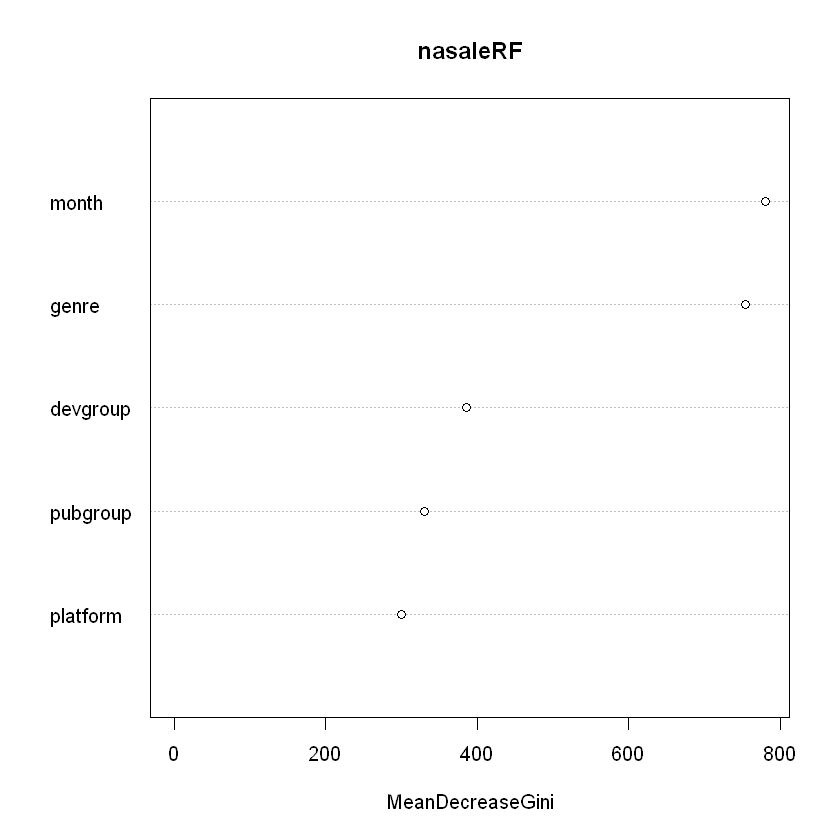

In [277]:

varImpPlot(nasaleRF)

In [252]:
numFolds = trainControl( method="cv", number=10)
cpGrid = expand.grid( .cp=seq(0.01, 0.5, 0.01) )
train(salegroup ~genre+platform+month+pubgroup+devgroup, data=data1Train, method="rpart", trControl = numFolds, tuneGrid = cpGrid ) 

CART 

4966 samples
   5 predictor
   4 classes: 'a', 'b', 'c', 'd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4470, 4470, 4469, 4470, 4469, 4470, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa     
  0.01  0.3856184  0.17803774
  0.02  0.3548041  0.13620882
  0.03  0.3330591  0.10728250
  0.04  0.3131262  0.08896192
  0.05  0.3034581  0.06858290
  0.06  0.2740640  0.00000000
  0.07  0.2740640  0.00000000
  0.08  0.2740640  0.00000000
  0.09  0.2740640  0.00000000
  0.10  0.2740640  0.00000000
  0.11  0.2740640  0.00000000
  0.12  0.2740640  0.00000000
  0.13  0.2740640  0.00000000
  0.14  0.2740640  0.00000000
  0.15  0.2740640  0.00000000
  0.16  0.2740640  0.00000000
  0.17  0.2740640  0.00000000
  0.18  0.2740640  0.00000000
  0.19  0.2740640  0.00000000
  0.20  0.2740640  0.00000000
  0.21  0.2740640  0.00000000
  0.22  0.2740640  0.00000000
  0.23  0.2740640  0.00000000
  0.24  0.2740640  0.00000000
  0.25  0.2

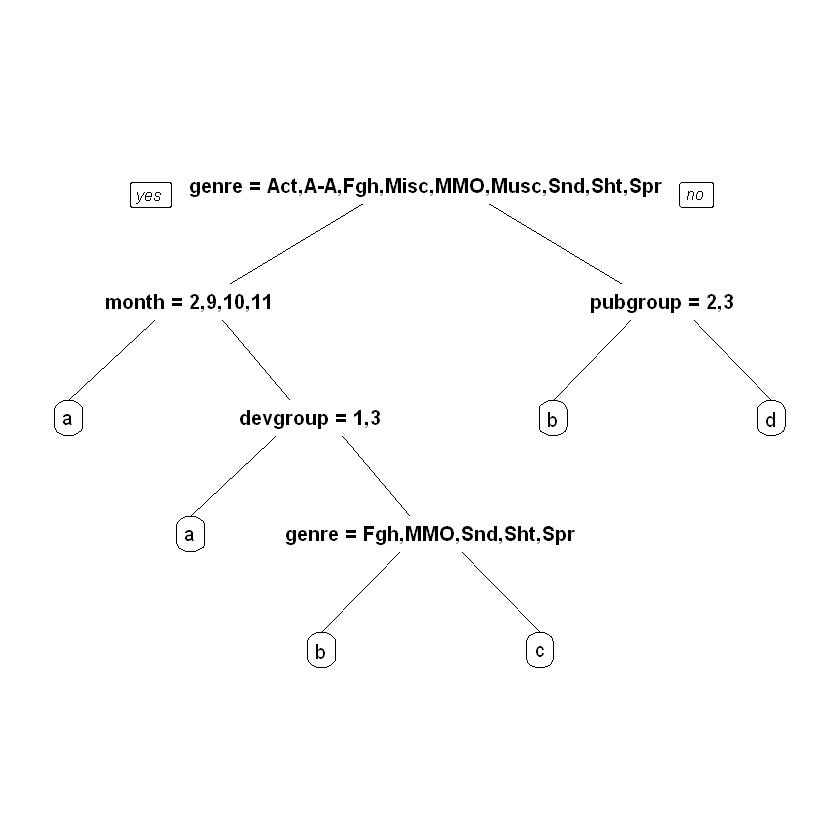

In [253]:
StevensTree = rpart(salegroup ~genre+platform+month+pubgroup+devgroup, data=data1Train, method="class", cp=0.01) 
prp(StevensTree)

In [259]:
Predict1 = predict( StevensTree, newdata=data1Train, type="class")
table(data1Train$salegroup, Predict1)

   Predict1
      a   b   c   d
  a 872 166  99 125
  b 525 260 152 345
  c 408 193 270 490
  d 168 106 214 573